In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ASM2D_flowsheet import *

In [2]:
x_aut_reductions = [0, 0.5]

if __name__ == "__main__":
    # This method builds and runs a steady state activated sludge
    # flowsheet for different X_AUT reductions
    stream_tables = {}
    
    for x_aut_reduction in x_aut_reductions:
        m, results = build_flowsheet(x_aut_reduction)

        stream_table = create_stream_table_dataframe(
            {
                "Feed": m.fs.FeedWater.outlet,
                "Mix": m.fs.R1.inlet, 
                "R1": m.fs.R1.outlet,
                "R2": m.fs.R2.outlet,
                "R3": m.fs.R3.outlet,
                "R4": m.fs.R4.outlet,
                "R5": m.fs.R5.outlet,
                "R6": m.fs.R6.outlet,
                "R7": m.fs.R7.outlet,
                "Treated": m.fs.Treated.inlet
            },
            time_point=0,
        )
        stream_tables[f"X_AUT reduction {x_aut_reduction}"] = stream_table
        print(f"\nResults for X_AUT reduction = {x_aut_reduction}:")
        print(stream_table_dataframe_to_string(stream_table))

2025-03-04 14:41:35 [WARNING] idaes.core.util.scaling: Trying to get scaling factor for unnamed expr 
2025-03-04 14:41:35 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.R1.control_volume.volume
2025-03-04 14:41:35 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.R1.control_volume.rate_reaction_extent[0.0,R1]
2025-03-04 14:41:35 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.R1.control_volume.rate_reaction_extent[0.0,R2]
2025-03-04 14:41:35 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.R1.control_volume.rate_reaction_extent[0.0,R3]
2025-03-04 14:41:35 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.R1.control_volume.rate_reaction_extent[0.0,R4]
2025-03-04 14:41:35 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.R1.control_volume.rate_reaction_extent[0.0,R5]
2025-03-04 14:41:35 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.R1.control_volume.rate_reaction_extent[0.0,

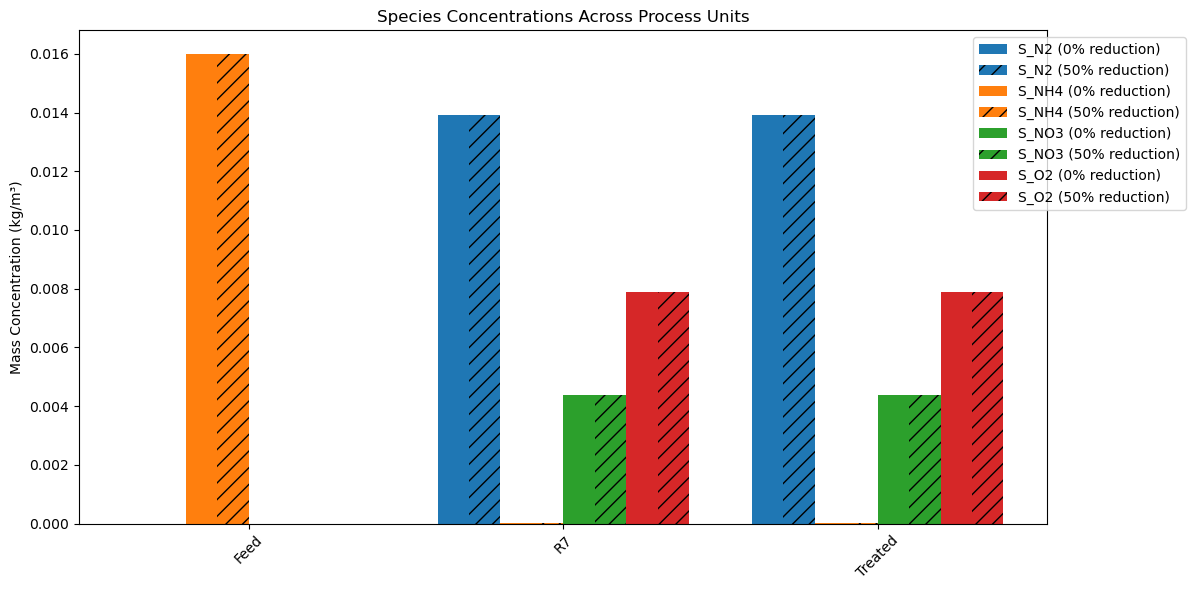

In [4]:
# Extract the relevant rows and convert to numeric values
species = ['S_N2', 'S_NH4', 'S_NO3', 'S_O2']
locations = ['Feed', 'R7', 'Treated']

data_0 = []
data_50 = []
for s in species:
    row_0 = stream_tables['X_AUT reduction 0'].loc[f'Mass Concentration {s}']
    row_50 = stream_tables['X_AUT reduction 0.5'].loc[f'Mass Concentration {s}']
    # Extract only the values for the locations we want
    values_0 = [row_0[loc] for loc in locations]
    values_50 = [row_50[loc] for loc in locations]
    data_0.append(values_0)
    data_50.append(values_50)

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(locations))
width = 0.1  # Make bars thinner to fit side by side

for i in range(len(species)):
    # No reduction bars (solid)
    offset = width * 2 * i
    ax.bar(x + offset, data_0[i], width, label=f'{species[i]} (0% reduction)', 
           color=f'C{i}')
    
    # 50% reduction bars (hatched)
    ax.bar(x + offset + width, data_50[i], width, label=f'{species[i]} (50% reduction)',
           color=f'C{i}', hatch='//')

# Customize the chart
ax.set_ylabel('Mass Concentration (kg/m³)')
ax.set_title('Species Concentrations Across Process Units')
ax.set_xticks(x + width*3.5)
ax.set_xticklabels(locations)
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()